<a href="https://colab.research.google.com/github/choki0715/lecture/blob/master/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd

data_dict = {
    'Outlook' : ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny','Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy']
    ,'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild','Mild','Mild', 'Hot', 'Mild']
    ,'Humidity' : ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High','Normal','Normal', 'Normal', 'High', 'Normal', 'High']
    ,'Wind': ['False', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'True']
    ,'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}
tennis = pd.DataFrame(data_dict, columns=data_dict.keys())
tennis

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,False,No
1,Sunny,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Rainy,Mild,High,False,Yes
4,Rainy,Cool,Normal,False,Yes
5,Rainy,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Sunny,Mild,High,False,No
8,Sunny,Cool,Normal,False,Yes
9,Rainy,Mild,Normal,False,Yes


In [18]:
# 원시 데이터 --> 학습 데이터 

#df_getdummy=pd.get_dummies(data=df, columns=['Temperature', 'Outlook', 'Windy'])

x = tennis.iloc[:, range(4)]
x = pd.get_dummies(x)
y = tennis[['PlayTennis']]

t = x.join(y)

print(t)

#t['PlayTennis'] = t['PlayTennis'] == 'yes'

display(t)
#display(t.groupby(['PlayTennis', 'Humidity_High']).size().unstack())

    Outlook_Overcast  Outlook_Rainy  ...  Wind_True  PlayTennis
0                  0              0  ...          0          No
1                  0              0  ...          1          No
2                  1              0  ...          0         Yes
3                  0              1  ...          0         Yes
4                  0              1  ...          0         Yes
5                  0              1  ...          1          No
6                  1              0  ...          1         Yes
7                  0              0  ...          0          No
8                  0              0  ...          0         Yes
9                  0              1  ...          0         Yes
10                 0              0  ...          1         Yes
11                 1              0  ...          1         Yes
12                 1              0  ...          0         Yes
13                 0              1  ...          1          No

[14 rows x 11 columns]


,Outlook_Overcast,Outlook_Rainy,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_False,Wind_True,PlayTennis
0,0,0,1,0,1,0,1,0,1,0,No
1,0,0,1,0,1,0,1,0,0,1,No
2,1,0,0,0,1,0,1,0,1,0,Yes
3,0,1,0,0,0,1,1,0,1,0,Yes
4,0,1,0,1,0,0,0,1,1,0,Yes
5,0,1,0,1,0,0,0,1,0,1,No
6,1,0,0,1,0,0,0,1,0,1,Yes
7,0,0,1,0,0,1,1,0,1,0,No
8,0,0,1,1,0,0,0,1,1,0,Yes
9,0,1,0,0,0,1,0,1,1,0,Yes


In [26]:
from sklearn.tree import DecisionTreeClassifier

Deision_Tree = DecisionTreeClassifier(criterion='entropy')
result=Deision_Tree.fit(x, y)

[Text(223.20000000000002, 195.696, 'X[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(186.0, 152.208, 'X[7] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(111.60000000000001, 108.72, 'X[2] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(74.4, 65.232, 'X[9] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(37.2, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(111.60000000000001, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(148.8, 65.232, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(260.40000000000003, 108.72, 'X[8] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(223.20000000000002, 65.232, 'X[5] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(186.0, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(260.40000000000003, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(297.6, 65.232, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(260.40000000000

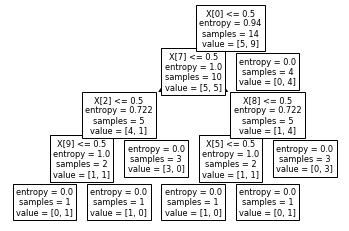

In [27]:
from sklearn import tree
tree.plot_tree(result)


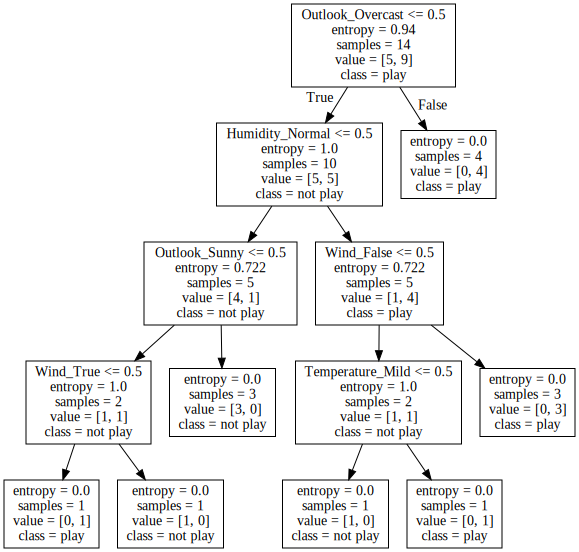

In [30]:
import graphviz 
dot_data = tree.export_graphviz(result, out_file=None, feature_names=x.columns.tolist(),
                class_names=['not play', 'play']) 
graph = graphviz.Source(dot_data) 
graph